In [560]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import DeepLearningBase as dp
import scikitplot as skplt

file_path_gender = "gender_submission.csv"
file_path_train = "train.csv"
file_path_test = "test.csv"



In [561]:
def replace_embarked(embarked):
    if embarked == 'Q':
        return 0
    elif embarked == 'S':
        return 1
    else:
        return 2

In [562]:
def replace_gender(gender):
    if gender == 'male':
        return 0
    else:
        return 1

In [563]:
def replace_name(name):
    if "Mrs." in name:
        return 0
    elif "Mr." in name:
        return 1
    elif "Miss" in name:
            return 2
    else: return 3

In [564]:
def is_child(x):
    if x < 18:
        return 1
    else:
        return 0

In [565]:
def is_adult(x):
    if (x >= 18) & (x <= 65):
        return 1
    else:
        return 0

In [566]:
def is_very_old(x):
    if x > 65:
        return 1
    else:
        return 0

In [567]:
from itertools import *
def fillna_age(df):
    l1, l2 = [1,2,3], ["female","male"]
    for c,s in product(l1,l2):
        msk = (df["Pclass"]==c) & (df["Sex"]==s)
        df.loc[msk,"Age"] = df[msk]["Age"].fillna(df[msk]["Age"].median())
    return df

In [568]:
def create_age_group(x):
    age_group_young = x.map(lambda df: is_child(df)).rename('is_child')
    age_group_adult = x.map(lambda df: is_adult(df)).rename('is_adult')
    age_group_old = x.map(lambda df: is_very_old(df)).rename('is_old')
    return pd.concat([age_group_young, age_group_old, age_group_adult], axis=1)

In [569]:
def create_df(df_initial):
    X_embarked = df_initial.Embarked.map(lambda df: replace_embarked(df))
    X_gender = df_initial.Sex.map(lambda df: replace_gender(df))
    X_name = df_initial.Name.map(lambda df: replace_name(df))
    X_class = df_initial.Pclass
    X_sib = df_initial.SibSp
    X_parch = df_initial.Parch
    X_fare = df_initial.Fare
    X_age = fillna_age(df_initial).Age
    # X_age = df_initial.Age.fillna(value=df_train.Age.mean())
    X_age_group = create_age_group(X_age)

    return pd.concat([X_gender, X_class, X_name, X_embarked, X_sib, X_fare, X_parch, X_age, X_age_group], axis=1)

In [570]:
## Data visualising
def visualize_nan_values(X):

    fig = px.imshow(X.isna(), height=400)
    fig.show()

In [571]:
df_gender = pd.read_csv(file_path_gender)
df_train = pd.read_csv(file_path_train).set_index("PassengerId", drop=True)
df_test = pd.read_csv(file_path_test).set_index("PassengerId", drop=True)

df_total = pd.concat([df_test, df_train], axis=0)
print(df_total.tail())
visualize_nan_values(df_total.reset_index())

# We can see we have a lot of nan values in Cabin
# print(df_total.Age[df_total.Age.isna()])

             Pclass                                      Name     Sex   Age  \
PassengerId                                                                   
887               2                     Montvila, Rev. Juozas    male  27.0   
888               1              Graham, Miss. Margaret Edith  female  19.0   
889               3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890               1                     Behr, Mr. Karl Howell    male  26.0   
891               3                       Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch      Ticket   Fare Cabin Embarked  Survived  
PassengerId                                                            
887              0      0      211536  13.00   NaN        S       0.0  
888              0      0      112053  30.00   B42        S       1.0  
889              1      2  W./C. 6607  23.45   NaN        S       0.0  
890              0      0      111369  30.00  C148        C       1.0  
891           

[[0. 1. 1. ... 1. 0. 0.]
 [3. 1. 3. ... 3. 1. 3.]
 [1. 0. 2. ... 2. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


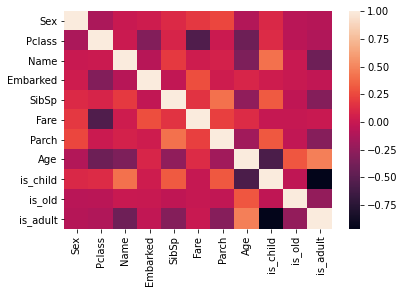

In [572]:
X = create_df(df_train)
Y = df_train.Survived

sns.heatmap(X.corr())

X = np.array(X).transpose()
Y = np.array(Y).reshape(891, 1)

print(X)

Cost after iteration 0: 0.693146
Cost after iteration 100: 0.684698
Cost after iteration 200: 0.678890
Cost after iteration 300: 0.674892
Cost after iteration 400: 0.672134
Cost after iteration 500: 0.670229
Cost after iteration 600: 0.668909
Cost after iteration 700: 0.667994
Cost after iteration 800: 0.667357
Cost after iteration 900: 0.666913
Cost after iteration 1000: 0.666603
Cost after iteration 1100: 0.666385
Cost after iteration 1200: 0.666230
Cost after iteration 1300: 0.666120
Cost after iteration 1400: 0.666038
Cost after iteration 1500: 0.665976
Cost after iteration 1600: 0.665924
Cost after iteration 1700: 0.665876
Cost after iteration 1800: 0.665825
Cost after iteration 1900: 0.665759
Cost after iteration 2000: 0.665660
Cost after iteration 2100: 0.665486
Cost after iteration 2200: 0.665136
Cost after iteration 2300: 0.664292
Cost after iteration 2400: 0.661762
Cost after iteration 2500: 0.653170
Cost after iteration 2600: 0.639436
Cost after iteration 2700: 0.633934
Cost

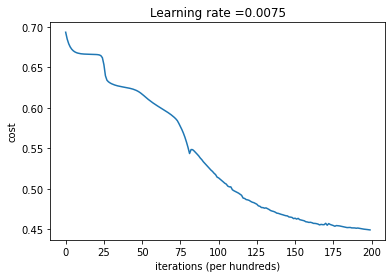

In [573]:
layer_dimensions = [11, 6, 5, 1]
dp.initialise_parameters(layer_dimensions)
parameters = dp.L_layer_model(X, Y.transpose(), layer_dimensions, num_iterations = 20000, print_cost=True)

In [574]:
X = create_df(df_test)
X = np.array(X).transpose()

Y = df_gender.Survived
Y = np.array(Y).reshape((418, 1))
print(X.shape, Y.shape)
dp.predict(X, Y.T, parameters)

(11, 418) (418, 1)
Accuracy: 92.58373205741626


array([[0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 